In [1]:
#Librerías
import pandas as pd
import scipy.io as sio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

A continuación se procederá a cargar las matrices de conectividad de cada una de las regiones que se tomó, es decir, se cargarán los datos de Universidad de Hiroshima, Kyoto y Tokyo. Además, se procesarán los datos de tal forma que se eliminen los NaN's.

In [2]:
#Datos Hiroshima
df = pd.read_csv('/media/maria/TOSHIBA EXT/SRPBS_FC/HiroshimaU/SUBINFO_HiroshimaU.tsv',sep='\t')
df2=  df[['Diagnosis(Healthy=1, Depression=2)']]

index_list = []

for i in range(0,433):
    if df2['Diagnosis(Healthy=1, Depression=2)'][i] == 2:
       index_list.append(i)
   
n = len(index_list)
 

mat1 = sio.loadmat('/media/maria/TOSHIBA EXT/SRPBS_FC/HiroshimaU/DEP_BAL-UHIBP39_COR.mat')
H = mat1['X']
#print(np.shape(H)) 434x9730


A = np.zeros((n,9730))
#print(np.shape(A))
for k in range(0,173):
    A[k]=H[index_list[k]]
#print(np.shape(A))


#Encontrar NaNs y eliminarlos
dfn = pd.DataFrame(A)


#print(dfn.shape)

for i in range(0,173):
     dfn = dfn[dfn[i].notna()]


#print(dfn.shape)

#Volver a convertir los datos en np.array
H_1 = dfn.to_numpy()
#print(type(H_1))
#print(np.shape(H_1))

In [3]:
#Datos Kyoto
mat2 = sio.loadmat('/media/maria/TOSHIBA EXT/SRPBS_FC/KyotoU/DEP/BAL-KyotoU_UKY_DEP_16_BAL_BP39_COR.mat')
K = mat2['X']

#Encontrar NaNs y eliminarlos
dfn2 = pd.DataFrame(K)
            

#print(dfn2.shape)   
    
for i in range(0,15): 
     dfn2 = dfn2[dfn2[i].notna()]


#print(dfn2.shape)

In [4]:
#Datos Tokyo
mat3 = sio.loadmat('/media/maria/TOSHIBA EXT/SRPBS_FC/UTO/UTO_GEMR750W_30_BAL/MDD/UTO_GEMR750W_30_02_BAL_COR.mat')
T = mat3['X']

#Encontrar NaNs y eliminarlos
dfn3 = pd.DataFrame(T)

#print(dfn3.shape)

for i in range(0,61):
     dfn3 = dfn3[dfn3[i].notna()]

#print(dfn3.shape)

Se define la función que tomará los valores de las matrices de conectividad que están dados por el Coeficiente de Correlación de Pearson y los convertirá en distacias, de tal forma que se obtengan matrices de distancias en lugar de matrices de conectividad. La función a aplicar está dada por

$$
\begin{equation}
d(x,y) = \sqrt{1-\corr(x,y)^{2}}
\end{equation}
$$
Donde x,y $\in \mathbb{R}^{D}\Diag$ para algún $D \in \mathbb{N}$ y $corr(x,y)$ es el coeficiente de correlación de Pearson.

In [5]:
#Función matriz de distancia
def distance(C):
    B = np.sqrt(1-pow(C,2))
    return B

Hn = distance(H_1)
Kn = distance(K)
Tn = distance(T)

Dado que las entradas de las matrices de correlación tienen dimensiones $D \times 9730$ y están organizadas de tal forma que la fila $i$ corresponde a un paciente y/o control sano y las columnas son los coeficientes de Pearson de ese paciente $i$, se procede a construir una matriz simétrica de dimesiones $140 \times 140$. Esta dimensión es posible ya que tenemos $\frac{n(n-1)}{2}$ donde $n=140$, esto es, $\frac{140\cdot 139}{2} = 9730$. Sin embargo, trabajaremos desde ahora con las matrices de distancias.

In [6]:
#Función de matriz simétrica
def matr(a,l):
    b=np.zeros((l,l))
    k=0
    for i in range(0,l):
        for j in range(0,l-i):
            if i==(j+i):
                continue
            else:
                b[i,i+j]=a[k]
                b[j+i,i]=a[k]
                k+=1
    return b

#Lista de matrices simétricas
matr_listh=[]
matr_listk=[]
matr_listt=[]


def listas(Z, lista):
    for k in range(0, len(Z)):
        lista.append(matr(Z[k],140))
    return lista

listh = listas(Hn, matr_listh)
listk = listas(Kn, matr_listk)
listt = listas(Tn, matr_listt)

A continuación vamos a visualizar las matrices por medio de un mapa de calor, donde cada fila y cada columa se relaciona con una región de las $140$. Para ello convertiremos una de las matrices en un dataframe para asignar el respectivo valor de la fila y columna.

In [7]:
mat1 = sio.loadmat('/media/maria/TOSHIBA EXT/Universidad/2023-2/Trabajo de grado/Datos/Nuevos Datos/ROIS/ROITBL_BAL.mat')
H = mat1['ROI']
#print(H[0,0][0,0][1][0])

#Creación de diccionarios con rois
rois_index = []
rois_names = []

def diccionario(matrix, list_keys, list_rois):
    for k in range(140):
        list_keys.append(k)
        list_rois.append(H[0,k][0,0][1][0])
    return dict(zip(list_keys, list_rois))


rois = diccionario(H, rois_index, rois_names)

dfmatrix_cof_roi1 = pd.DataFrame(listh[0], 
                             index=rois_names,
                             columns=rois_names)
dfmatrix_cof_roi2 = pd.DataFrame(listk[0], 
                             index=rois_names,
                             columns=rois_names)
dfmatrix_cof_roi3 = pd.DataFrame(listt[0], 
                             index=rois_names,
                             columns=rois_names)
#print(dfmatrix_cof_roi)

<Axes: >

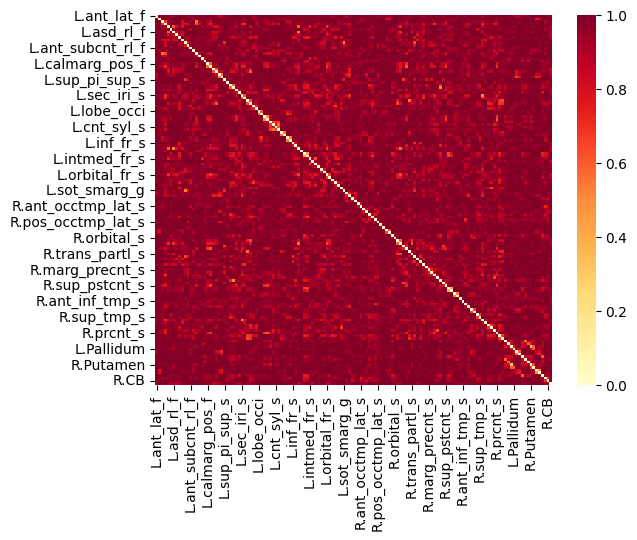

In [8]:
sns.heatmap(dfmatrix_cof_roi1,cmap="YlOrRd")

In [15]:
def matr2(a,l):
    b=np.identity(l)
    k=0
    for i in range(0,l):
        for j in range(0,l-i):
            if i==(j+i):
                continue
            else:
                b[i,i+j]=a[k]
                b[j+i,i]=a[k]
                k+=1
    return b

def listas2(Z, lista):
    for k in range(0, len(Z)):
        lista.append(matr2(Z[k],140))
    return lista

<Axes: >

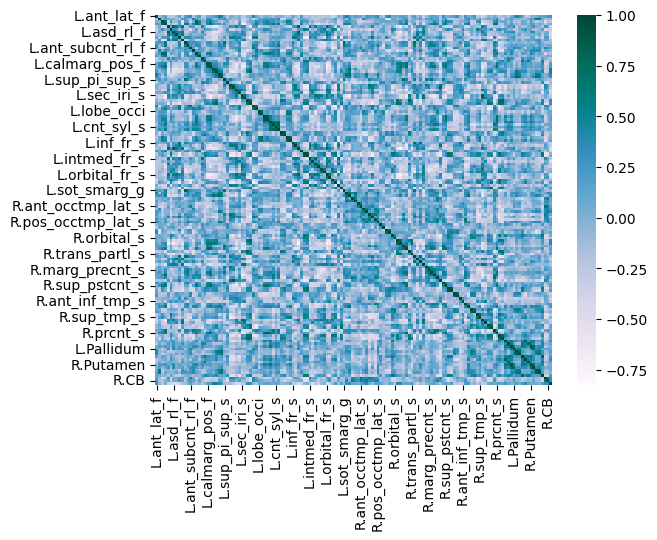

In [17]:
matr_listh_nd=[]
matr_listk_nd=[]
matr_listt_nd=[]

listh_nd = listas2(H_1, matr_listh_nd)
listk_nd = listas2(K, matr_listk_nd)
listt_nd = listas2(T, matr_listt_nd)

dfmatrix_cof_roi1_nd = pd.DataFrame(listh_nd[0], 
                             index=rois_names,
                             columns=rois_names)

sns.heatmap(dfmatrix_cof_roi1_nd,cmap="PuBuGn")

Ahora haremos la división de los datos en entrenamiento, validación y test. Estos datos se tomarán en porcentanjes de $70 \%$, $20 \%$ y $10 \%$ respectivamente.

<Axes: >

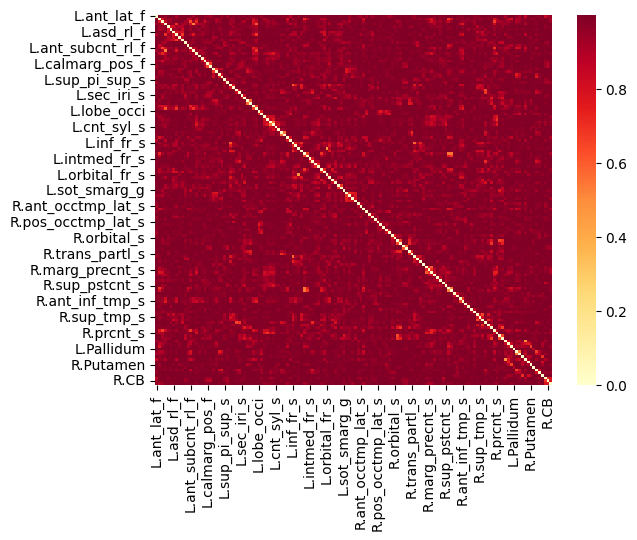

In [28]:
sns.heatmap(dfmatrix_cof_roi2,cmap="YlOrRd")

<Axes: >

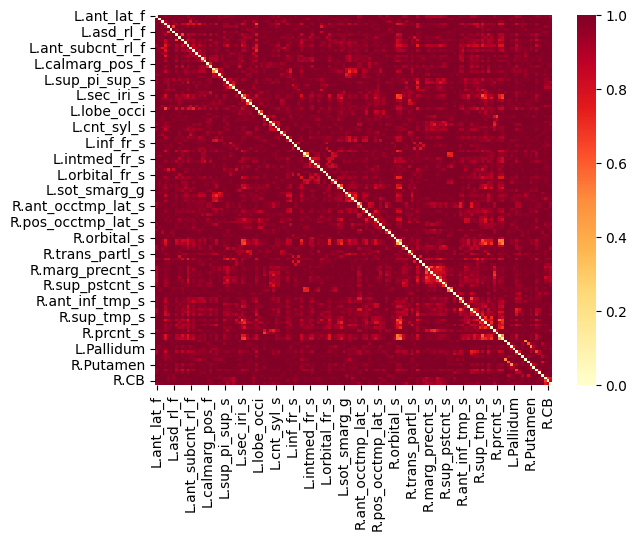

In [29]:
sns.heatmap(dfmatrix_cof_roi3,cmap="YlOrRd")

In [43]:
#Separación datos entrenamiento y test
def n_elementos(lista):
    p = len(lista)  #Cantidad de datos por lista
    q = math.trunc(0.7*p)  #Cantidad de datos para entrenamiento
    r = p-q  #Cantidad de datos para test
    return [p, q, r]

#Número de datos por lista
h = n_elementos(listh)[0]
k = n_elementos(listk)[0]
t = n_elementos(listt)[0]



#Número de datos para entrenamiento por lista
he = n_elementos(listh)[1] 
ke = n_elementos(listk)[1]
te = n_elementos(listt)[1]

#print(he)
#print(ke)
#print(te)

#Número de datos para test por lista
ht = n_elementos(listh)[2]
kt = n_elementos(listk)[2]
tt = n_elementos(listt)[2]

#print(ht)
#print(kt)
#print(tt)

In [46]:
#Índices de datos para entrenamiento 
random.seed(0)
def indice(a, b):
    L=list(range(0,a)) #crea una lista con todos los índices de elementos del dataset
    random.shuffle(L) #baraja la lista
    Lb=L[:b] #crea otra lista con el número de elementos de entrenamiento 
    Lb.sort() #ordena la lista 
    return Lb



l_ind_he = indice(h, he)
l_ind_ke = indice(k, ke)
l_ind_te = indice(t, te)


#Lista de datos para entrenamiento
ent_listh = []
ent_listk = []
ent_listt = []

def entre(indlist, datalist, entlist):
    for i in indlist:
        entlist.append(datalist[i])
    return entlist

e_listh = entre(l_ind_he,listh, ent_listh)
e_listk = entre(l_ind_ke,listk, ent_listk)
e_listt = entre(l_ind_te,listt, ent_listt)

list_entrenamiento = e_listh + e_listk + e_listt

#print(len(list_entrenamiento))

#Índices de datos para test
def indicet(a, indlist):
    L=list(range(0,a))
    for i in range(a):
        for element in indlist:
            if i == element:
                L.remove(element)
            else:
                continue
    return L

l_ind_ht = indicet(h, l_ind_he)
l_ind_kt = indicet(k, l_ind_ke)
l_ind_tt = indicet(t, l_ind_te)


#Lista de datos para test
test_listh = []
test_listk = []
test_listt = []

def test(indlist, datalist, testlist):
    for i in indlist:
        testlist.append(datalist[i])
    return testlist

t_listh = test(l_ind_ht,listh, test_listh)
t_listk = test(l_ind_kt,listk, test_listk)
t_listt = test(l_ind_tt,listt, test_listt)

list_test = t_listh + t_listk + t_listt
#print(len(list_test))

Convertiremos las listas obtenidas en anteriormente en diccionarios para así poder guardar las matrices de distancias.

In [47]:
#Creación de diccionarios
key_list_e = []
key_list_t = []
def diccionario(lista_keys, lista_data):
    for k in range(1, len(lista_data)+1):
        lista_keys.append(str(k))
    return dict(zip(lista_keys, lista_data))

dict_entrenamiento = diccionario(key_list_e, list_entrenamiento)
dict_test = diccionario(key_list_t, list_test)

In [48]:
#Exportar archivos .mat
sio.savemat('/media/maria/TOSHIBA EXT/Universidad/2023-2/Trabajo de grado/Datos/Nuevos Datos/Matrices_distancia/MDD/training_matrix.mat', dict_entrenamiento)
sio.savemat('/media/maria/TOSHIBA EXT/Universidad/2023-2/Trabajo de grado/Datos/Nuevos Datos/Matrices_distancia/MDD/test_matrix.mat', dict_test)


In [ ]:
#Exportar archivos .mat
sio.savemat('/media/maria/TOSHIBA EXT/Universidad/2023-2/Trabajo de grado/Datos/Nuevos Datos/Matrices_distancia/MDD/training_matrix.mat', dict_entrenamiento)
sio.savemat('/media/maria/TOSHIBA EXT/Universidad/2023-2/Trabajo de grado/Datos/Nuevos Datos/Matrices_distancia/MDD/test_matrix.mat', dict_test)
